# Project 5 -- Aditya Mishra

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [9]:
options(jupyter.rich_display = F)

In [1]:
myDF <- read.csv("/anvil/projects/tdm/data/election/escaped2020sample.txt", sep="|")

In [11]:
head(myDF$TRANSACTION_DT)

[1]  7112019  3042020 12182019  8302019  3212019  7112019

In [12]:
library(lubridate, warn.conflicts = FALSE)

In [13]:
myDF$newdates <- mdy(myDF$TRANSACTION_DT)

In [14]:
#1A.
myDF$TRANSACTION_YR <- year(myDF$newdates)

In [15]:
#1B.
tapply(myDF$TRANSACTION_AMT, myDF$TRANSACTION_YR, sum)

     2002      2010      2015      2016      2017      2018      2019      2020 
      500       500       525      1250      2550    219497 581564250 485800503 

In [16]:
year_sum <- aggregate(list(myDF$TRANSACTION_AMT), list(myDF$TRANSACTION_YR), sum)

In [17]:
print(year_sum)
    

  Group.1 c.15L..39L..15L..10L..16L..42L..50L..105L..58L..25L..25L..8L..
1    2002                                                            500
2    2010                                                            500
3    2015                                                            525
4    2016                                                           1250
5    2017                                                           2550
6    2018                                                         219497
7    2019                                                      581564250
8    2020                                                      485800503


In [18]:
colnames(year_sum) <- c(year_sum$TRANSACTION_YR, year_sum$TRANSACTION_AMT_CUM)

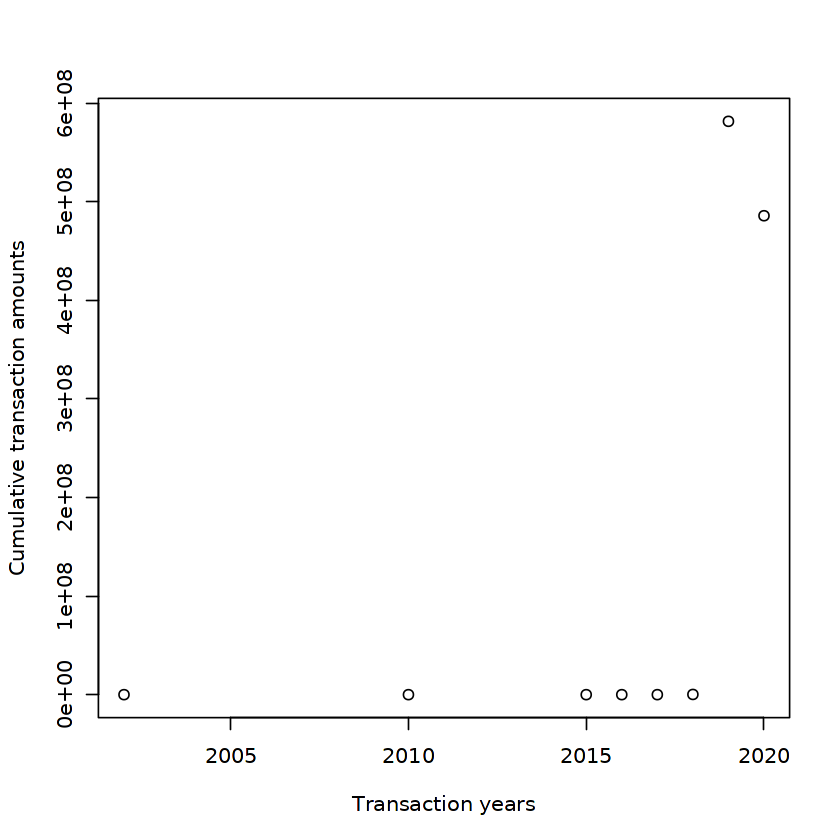

In [19]:
#1C.
plot(year_sum, xlab = "Transaction years", ylab = "Cumulative transaction amounts")

## Question 2

In [20]:
#2A.

my2020DF <- subset(myDF, TRANSACTION_YR == "2020")

In [21]:
my2020DF$TRANSACTION_MONTH <- month(my2020DF$newdates) 

In [22]:
#2B. 

tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONTH, sum)

        1         2         3         4         5        12 
 69236956 308473457  92913000  14690773    483017      3300 

In [23]:
month_sum <- aggregate(list(my2020DF$TRANSACTION_AMT), list(my2020DF$TRANSACTION_MONTH), sum)

In [24]:
colnames(month_sum) <- c(month_sum$TRANSACTION_AMT, month_sum$TRANSACTION_AMT_CUM)

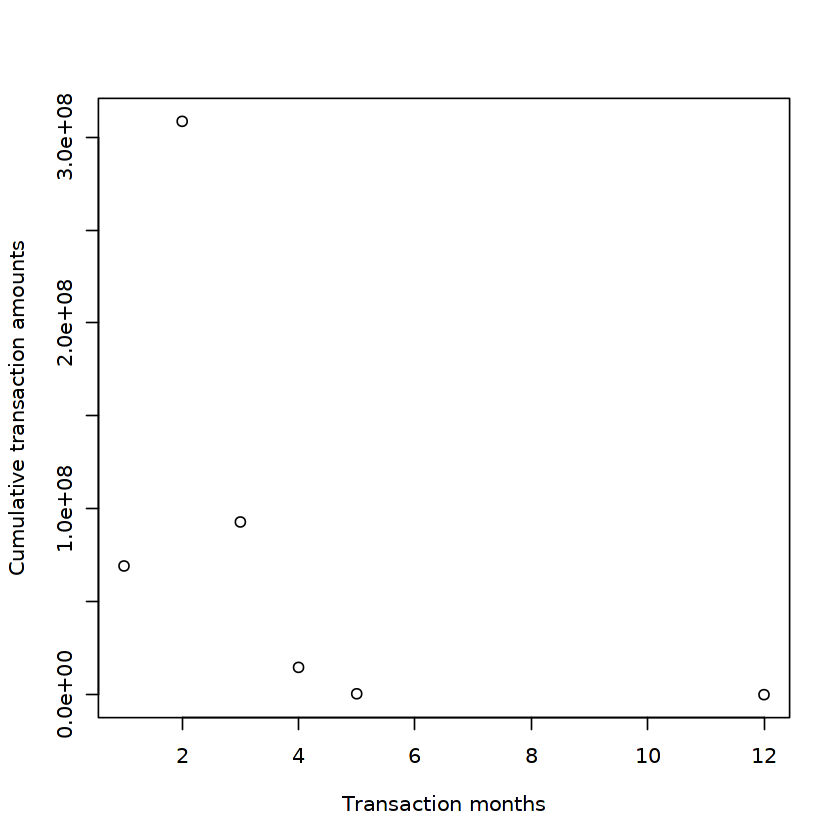

In [25]:
#2C.

plot(month_sum, xlab = "Transaction months", ylab = "Cumulative transaction amounts")

## Question 3

In [26]:
#3A.
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)))

            REPUBLICAN GOVERNORS ASSOCIATION 
                                     3300000 
UNITED BROTHERHOOD OF CARPENTERS AND JOINERS 
                                     3936291 
                                  YASS, JEFF 
                                     6047000 
   EVERYTOWN FOR GUN SAFETY ACTION FUND, INC 
                                    10005656 
                                 STEYER, TOM 
                                    24796081 
                       BLOOMBERG, MICHAEL R. 
                                   275751211 

In [28]:
#3B.
tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)

                 AA        AB        AE        AK        AL        AP        AR 
   431548     32243      1474     87137   1627993   7195054     49240   5690116 
       AS        AZ        BC        CA        CO        CT        DC        DE 
     2908  11750510     12083 151842431  18025653  12065158  37280905   2120061 
       FL        FM        GA        GU        HI        IA        ID        IL 
 44118779      2250  17026567     78087   1730014   4291247   1626126  27940911 
       IN        KS        KY        LA        MA        MB        MD        ME 
  8906170   4311170   4440149   6202190  32308431       213  14940848   3393310 
       MH        MI        MN        MO        MP        MS        MT        NB 
     5000  15933204   9990430   7123990     10098   1844410   2389091       417 
       NC        ND        NE        NH        NJ        NL        NM        NS 
 13368140   1665152   2418525   2970383  16327791       909   4137547       678 
       NT        NV        N

In [29]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)), 5)

       DC        FL        TX        CA        NY 
 37280905  44118779  63719103 151842431 364883860 

In [31]:
colnames(myDF)

 [1] "CMTE_ID"         "AMNDT_IND"       "RPT_TP"          "TRANSACTION_PGI"
 [5] "IMAGE_NUM"       "TRANSACTION_TP"  "ENTITY_TP"       "NAME"           
 [9] "CITY"            "STATE"           "ZIP_CODE"        "EMPLOYER"       
[13] "OCCUPATION"      "TRANSACTION_DT"  "TRANSACTION_AMT" "OTHER_ID"       
[17] "TRAN_ID"         "FILE_NUM"        "MEMO_CD"         "MEMO_TEXT"      
[21] "SUB_ID"          "newdates"        "TRANSACTION_YR" 

In [46]:
#3C.
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)), 10)

200361806 101543302     78209     20006 200012133 190041188 101634184 941040626 
  2500100   2603700   3357597   3763519   3972934   5014000  10005656  24794281 
101501101 101501060 
 64868135 210077476 

3B. The most amount of money was given by the following 5 states (from most to least) -

1. New York

2. California

3. Texas

4. Florida

5. District of Columbia

3C. The most amount of money was given by the following 10 zip codes, from most to least - 

1. 101501060

2. 101501101

3. 941040626

4. 101634184

5. 190041188

6. 200012133

7. 20006

8. 78209

9. 101543302

10. 200361806


## Question 4

Warning message in dotchart(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)), :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


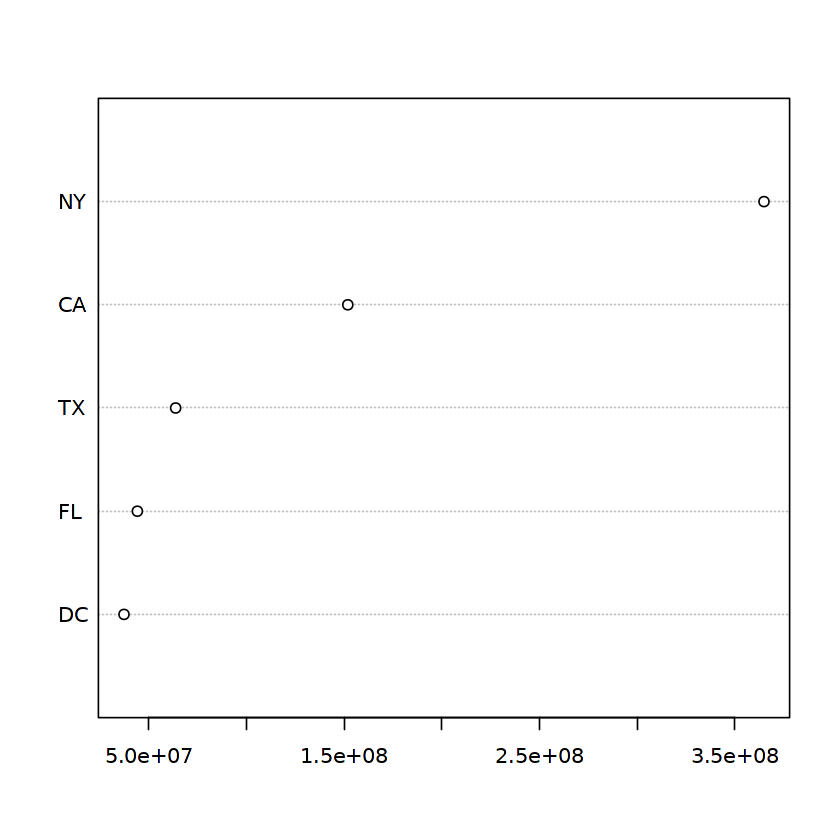

In [44]:
#4A.
dotchart(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)),5))

Warning message in dotchart(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


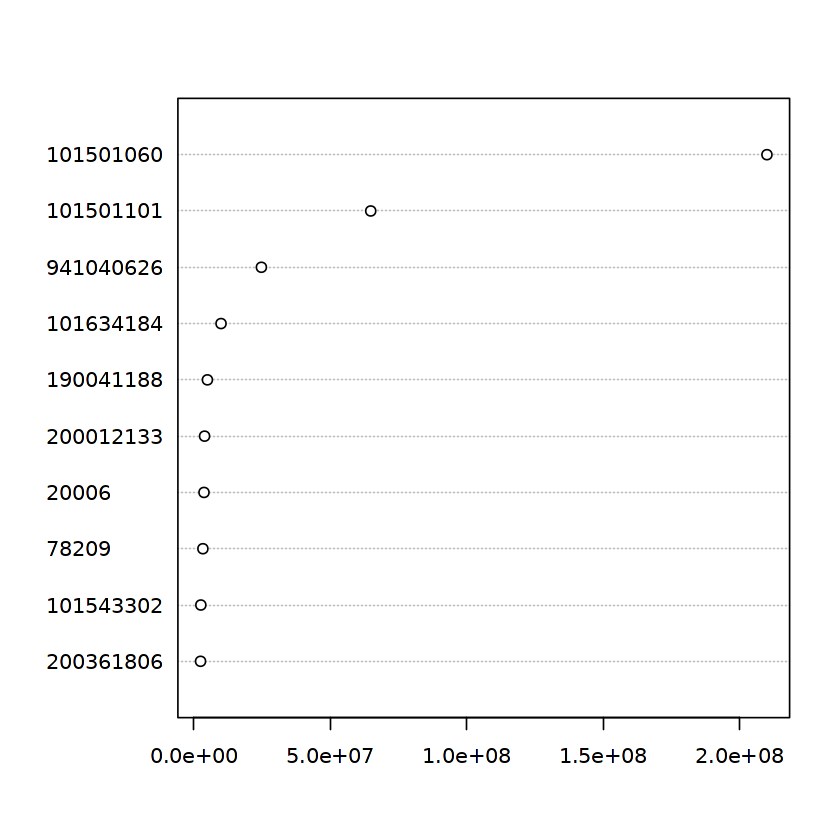

In [45]:
#4B.
dotchart(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)),10))

## Question 5

In [47]:
print(year_sum)

                
1 2002       500
2 2010       500
3 2015       525
4 2016      1250
5 2017      2550
6 2018    219497
7 2019 581564250
8 2020 485800503


We observe that the total donation amount generally rises sharply before election season, like in 2016 and around 2020. But the general elections in 2020 saw an extremely unprecedented rise in the amount of donations, rising by multiple orders of magnitude, which probably showcase the extremely high regard, and extreme competitiveness of that election

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.